<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2019</span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Notebook 05: JuliaOpt - Julia optimization libraries - statement</font></p>
</p></br>
</p>
</CENTER>

---------------------------

# <span style="color:#00B8DE"> I - Symbolic computation for optimization with Sympy</span>

Sympy is a Python library for symbolic computation that can be interfaced simply with Julia. It can be used when possible to get closed form solution of optimization problems. Inside Julia, additional Julia syntaxes can be used to work with Sympy.

## Refs:

> - https://www.sympy.org/ (sympy website)
> - https://github.com/JuliaPy/SymPy.jl (SymPy Julia interface)
> - http://mth229.github.io/symbolic.html (tuto)
> - https://github.com/jverzani/SymPy.jl/blob/master/examples/tutorial.md (tuto)


In [1]:
#using Pkg
#Pkg.add("SymPy")
#Pkg.build("SpecialFunctions")

## <span style="color:#00B8DE"> a) - Example </span>

In [2]:
using SymPy
#using LaTeXStrings

@vars z
solve((2z^2+z+5)')

2-element Array{Sym,1}:
 -1/4 - sqrt(39)*I/4
 -1/4 + sqrt(39)*I/4

In [3]:
diff(z^4+z^2+6z,z)

   3          
4⋅z  + 2⋅z + 6

In [4]:
a = symbols("a",positive=true)
b = symbols("b",negative=true)
diff(abs(a)),diff(abs(b))

(1, -1)

## <span style="color:#00B8DE"> b) - Constrained optimization: equality constraint </span>

Using Sympy solve 

$$
\left\{
\begin{array}{l}
{\text{opt}}_{x,y}\; f(x,y) = xy \\
{\text {s.t.}}\; h(x,y) = \left(\dfrac x a \right)^2 + \left(\dfrac y b \right)^2-1=0
\end{array}
\right.
$$

In [5]:
import SymPy
# Parameters & functions
@vars x y
a,b    = symbols("a b", positive=true)
λ      = symbols("λ",real=true)
f(x,y) = x*y
h(x,y) = x^2/a^2 + y^2/b^2 - 1
# Solution
l(x,y,λ) = f(x,y)+λ*(h(x,y))  #l(x,y,λ) = f(x,y)+λ(h(x,y)) wrong expression!!!
KKT_eqs = [diff(l(x,y,λ),x),diff(l(x,y,λ),y),h(x,y)]

p = solve(KKT_eqs, [x, y, λ],dict=True)

4-element Array{Dict{Any,Any},1}:
 Dict(λ => -a*b/2,x => -sqrt(2)*a/2,y => -sqrt(2)*b/2)
 Dict(λ => a*b/2,x => -sqrt(2)*a/2,y => sqrt(2)*b/2)  
 Dict(λ => a*b/2,x => sqrt(2)*a/2,y => -sqrt(2)*b/2)  
 Dict(λ => -a*b/2,x => sqrt(2)*a/2,y => sqrt(2)*b/2)  

## <span style="color:#00B8DE"> c) - Constrained optimization: inequality constraint </span>

Using Sympy solve 

$$
\left\{
\begin{array}{l}
{\text{opt}}_{x,y}\; f(x,y) = xy \\
{\text {s.t.}}\; g_1(x,y) = (\frac x a)^2 + (\frac y b)^2\leq 1;\quad g_2(x,y) = -bx-ay+ab \leq 0
\end{array}
\right.
$$

In [6]:
# parameters & functions
#-----------------------
@vars x y
a,b    = symbols("a b", positive=true)
µ1,µ2  = symbols("µ1 µ2",real=true)
f(x,y) = x*y
g1(x,y) = x^2/a^2 + y^2/b^2 - 1
g2(x,y) = -b*x-a*y+a*b
l(x,y,µ1,µ2) = f(x,y)+µ1*g1(x,y)+µ2*g2(x,y)
KKT_eqs = [diff(l(x,y,µ1,µ2),x),diff(l(x,y,µ1,µ2),y),µ1*g1(x,y),µ2*g2(x,y),g1(x,y),g2(x,y)]
# Solution
#-----------
p = solve(KKT_eqs, [x, y,µ1,µ2 ],dict=True)

2-element Array{Dict{Any,Any},1}:
 Dict(x => 0,µ1 => a*b/2,y => b,µ2 => 1)
 Dict(x => a,µ1 => a*b/2,y => 0,µ2 => 1)

# <span style="color:#00B8DE"> II - Using JuliaOpt</span>

If high performance numerical optimization is searched for optimization, one can look at **JuliaOpt** (http://www.juliaopt.org/), an organization that brings together packages related to optimization. In particular it supplies

> - Julia standalone packages such as **Optim.jl** or **Convex.jl**
> - modeling languages
> - external solver interfaces
<!-- >![alt text](./optim_overview.png) -->

#### *Note:* **MathProgBase** library is an API (Application Programming Interface) for mathematical optimization solvers that has been replaced recently by **MathOptInterface**


## Refs:

> - https://www.juliaopt.org/ (JuliaOpt)
> - http://www.juliaopt.org/packages/ (JuliaOpt packages list)
> - https://github.com/JuliaOpt/Convex.jl (Convex)
> - https://convexjl.readthedocs.io/en/latest/
> - http://www.juliaopt.org/JuMP.jl/v0.19.0/ (JuMP)
> - https://github.com/JuliaOpt/MathOptInterface.jl (MathOptInterface)

## <span style="color:#00B8DE"> a) Minimizing Rosenborck's function with Optim.jl</span>

**Optim.jl**: a project to implement basic optimization algorithms in pure Julia for univariate and multivariate optimization.


https://github.com/JuliaNLSolvers/Optim.jl

Minimize Rosenbrock's $f({\bf x})=\sum_{i=1:n-1}[(1-{\bf x}_i)^2+100(x_{i+1}-x_i^2)^2]$ with library **Optim.jl**
using the conjugate gradient method. 
> - First let the algorithm compute the gradient by itself. Compare several optimization methods.
> - Then, call the optimization function supplying the gradient function. 
> - Compare execution time

Choose for instance $n=10$.

In [7]:
using Pkg
Pkg.add("Optim")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [8]:
using Optim

In [9]:
rosenbrock(x) = sum([(1.0 - x[i])^2 + 100.0 * (x[i+1] - x[i]^2)^2 for i in range(1,stop=9)])

rosenbrock (generic function with 1 method)

In [11]:
result = optimize(rosenbrock, zeros(10), Newton())

 * Status: failure (objective increased between iterations) (line search failed)

 * Candidate solution
    Minimizer: [1.00e+00, 1.00e+00, 1.00e+00,  ...]
    Minimum:   7.517991e-17

 * Found with
    Algorithm:     Newton's Method
    Initial Point: [0.00e+00, 0.00e+00, 0.00e+00,  ...]

 * Convergence measures
    |x - x'|               = 1.14e-14 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.14e-14 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.73e-23 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.95e-07 ≰ 0.0e+00
    |g(x)|                 = 1.05e-07 ≰ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    25
    f(x) calls:    122
    ∇f(x) calls:   122
    ∇²f(x) calls:  26


In [12]:
result = optimize(rosenbrock, zeros(10), ConjugateGradient())

 * Status: success

 * Candidate solution
    Minimizer: [1.00e+00, 1.00e+00, 1.00e+00,  ...]
    Minimum:   1.812227e-16

 * Found with
    Algorithm:     Conjugate Gradient
    Initial Point: [0.00e+00, 0.00e+00, 0.00e+00,  ...]

 * Convergence measures
    |x - x'|               = 2.09e-11 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.09e-11 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.63e-18 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 9.00e-03 ≰ 0.0e+00
    |g(x)|                 = 7.52e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    194
    f(x) calls:    405
    ∇f(x) calls:   212


In [13]:
result = optimize(rosenbrock, zeros(10), GradientDescent())

 * Status: failure (reached maximum number of iterations) (line search failed)

 * Candidate solution
    Minimizer: [9.97e-01, 9.94e-01, 9.89e-01,  ...]
    Minimum:   3.899416e-01

 * Found with
    Algorithm:     Gradient Descent
    Initial Point: [0.00e+00, 0.00e+00, 0.00e+00,  ...]

 * Convergence measures
    |x - x'|               = 7.29e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.31e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.19e-03 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.06e-03 ≰ 0.0e+00
    |g(x)|                 = 5.96e-01 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    2502
    ∇f(x) calls:   2502


In [14]:
function ∇_Ros!(∇,x)
    ∇[1] = -2*(1-x[1])-400*(x[2]-x[1]^2)*x[1]
    for i in range(2,stop=9)
        ∇[i] = -2*(1-x[i])-400*(x[i+1]-x[i]^2)*x[i] +200*(x[i]-x[i-1]^2)
    end
    ∇[10] = 200*(x[10]-x[9]^2)
end

∇_Ros! (generic function with 1 method)

In [15]:
optimize(rosenbrock, ∇_Ros!, zeros(10), Newton())

 * Status: success

 * Candidate solution
    Minimizer: [1.00e+00, 1.00e+00, 1.00e+00,  ...]
    Minimum:   5.953138e-25

 * Found with
    Algorithm:     Newton's Method
    Initial Point: [0.00e+00, 0.00e+00, 0.00e+00,  ...]

 * Convergence measures
    |x - x'|               = 5.54e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.54e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.02e-13 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.71e+11 ≰ 0.0e+00
    |g(x)|                 = 2.63e-11 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    24
    f(x) calls:    69
    ∇f(x) calls:   69
    ∇²f(x) calls:  24


## <span style="color:#00B8DE"> b) Linear and quadratic problems with Convex.jl</span>

**Convex.jl**: A Julia library for solving linear and convex problems via disciplined convex optimization (see the first slides of http://stanford.edu/~boyd/papers/pdf/dcp_talk.pdf for an introduction to the subject)

<!-- 
Examples: https://nbviewer.jupyter.org/github/JuliaOpt/Convex.jl/blob/master/examples/basic_usage.ipynb

https://convexjl.readthedocs.io/en/latest/quick_tutorial.html 
-->

In [16]:
import Pkg
Pkg.add("Convex") 
Pkg.add("ECOS") # a lightweight LQ (linear and quadratic) and conic solver 

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


#### <span style="color:#00B8DE"> Examples: linear programming</span>

In [17]:
using Convex
using ECOS

x = Variable()
y = Variable()
z = Variable()
expr = x + y + z
    problem = minimize(expr, x >= 1, y >= x, 4 * z >= y)
solve!(problem, ECOSSolver(verbose=0))
println("problem status = $(problem.status)")
println("[x, y, z]= $([round.(a.value; digits=2) for a in (x, y, z)])")

problem status = Optimal
[x, y, z]= [1.0, 1.0, 0.25]


In [18]:
using LinearAlgebra: Diagonal, norm

x = Variable(4)
c = [1; 2; 3; 4]
A = Diagonal(ones(4))
b = [10; 10; 10; 10]
p = Convex.maximize(dot(c, x)) # or c' * x
p.constraints += A * x <= b
p.constraints += [x >=0 ; x <= 10; x[2] <= 5; x[1] + x[4] - x[2] <= 6.5]
Convex.solve!(p, ECOSSolver(verbose=0))

println("problem status = $(p.status)")
println("objective = $(round(p.optval; digits=2))")
println("x_opt = $(round.(x.value; digits=2))")
println("x[1] + x[4] - x[2] = $(round.(evaluate(x[1] + x[4] - x[2])))")

problem status = Optimal
objective = 81.5
x_opt = [1.5; 5.0; 10.0; 10.0]
x[1] + x[4] - x[2] = [6.0]


#### <span style="color:#00B8DE"> Exercise: constrained minimum squared error</span>

> - Write and test a function to solve 
$$
\min \parallel{\bf Ax}-{\bf b}\parallel\; s.t.\; {\bf x}\succeq 0.
$$

In [19]:
function MSE(A,b)
    # Minimize ||Ax - b||^2 subject to x >= 0
    x = Variable(5)
    p = Convex.minimize(norm(A*x-b))
    p.constraints += [x >=0]
    Convex.solve!(p, ECOSSolver(verbose=0))
    println("problem status = $(p.status)")
    println("objective = $(round(p.optval; digits=2))")
    println("x_opt = $(round.(x.value; digits=2))")
end
    
# Generate random problem data
m = 3;  n = 5
A = randn(m, n); b = randn(m, 1)
MSE(A,b)

problem status = Optimal
objective = -0.0
x_opt = [0.9; 0.95; 2.39; 1.06; 2.87]


## <span style="color:#00B8DE"> c) Using JuMP.jl</span>

We will look at **JuMP** modeling language and use it with several optimization solvers.

**Notes** 
> - The API **MathProgBase** is being deprecated and replaced by **MathOptInterface**
> - Some packages need installation of additional libraries, possibly as a super-user (see system administrator)


In [20]:
using Pkg
Pkg.add("JuMP")

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [21]:
#Pkg.add("Cbc")      # LQ (linear and quadratic) programming
#Pkg.add("Clp")      # LQ programming
#Pkg.add("SCS")      # popular for cone programming
#Pkg.add("Pajarito") # MICP (mixed integer constraint)
#Pkg.add("NLopt")    # nonlinear optimization
Pkg.add("GLPK")     # GNU Linear Programming Kit

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


#### <span style="color:#00B8DE"> Example 1: linear program</span>

In [22]:
# https://github.com/JuliaOpt/JuMP.jl/blob/master/examples/basic.jl
using JuMP, GLPK, Test
"""
example_basic([verbose = true])
Formulate and solve a simple LP:
    max 5x + 3y
     st 1x + 5y <= 3
         0 <= x <= 2
         0 <= y <= 30
If `verbose = true`, print the model and the solution.
"""
function example_basic(verbose=true)
    model = Model(with_optimizer(GLPK.Optimizer))
    @variable(model, 0 <= x <= 2)
    @variable(model, 0 <= y <= 30)
    @objective(model, Max, 5x + 3y)
    @constraint(model, 1x + 5y <= 3.0)

    #set_silent(model)
    if verbose
        print(model)
    end

    optimize!(model)
    if verbose
        println("\nObjective value: $(objective_value(model))")
        println("x = $(value(x))")
        println("y = $(value(y))")
    end

    @test objective_value(model) ≈ 10.6
    @test value(x) ≈ 2
    @test value(y) ≈ 0.2
end

verbose = true
example_basic(verbose)

Max 5 x + 3 y
Subject to
 x + 5 y ≤ 3.0
 x ≥ 0.0
 y ≥ 0.0
 x ≤ 2.0
 y ≤ 30.0

Objective value: 10.6


x = 2.0
y = 0.2


Test Passed

x+5y=3, x=2, 5+μ+ν=0, 3+5μ=0 ⇒ x,y,μ,ν=2,0.2,-2/3,-13/3
μ and ν are negative (maximization problem) and other multipliers set to 0, Khun&Tucker conditions are satisfied and problem is convex. Hence we got the true solution

#### <span style="color:#00B8DE"> Example 2: quadratic objective</span>

In [23]:
Pkg.add("Ipopt")    # Interior Point Optimizer 

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [33]:
using JuMP
using Ipopt

function example_quadratic(verbose = true)
    m = Model(with_optimizer(Ipopt.Optimizer,print_level=0))
    @variable(m, 0 <= x <= 2 )
    @variable(m, 0 <= y <= 30 )
    #@objective(m, Min, x*x+ 2x*y + y*y)
    @objective(m, Min, x*x+ 2x*y + y*y)  #??? non linear
    @constraint(m, x + y >= 1 )
 
    if verbose
        print(m)
    end

    set_silent(m)
    optimize!(m)
    if verbose
        println("\nObjective value: $(round(objective_value(m);digits=2))")
        println("x = $(round(value(x);digits=2))")
        println("y = $(round(value(y);digits=2))")
    end
end

example_quadratic()

Min x * x + (2.0 * x) * y + y * y
Subject to
 x + y ≥ 1.0
 x ≥ 0.0
 y ≥ 0.0
 x ≤ 2.0
 y ≤ 30.0

Objective value: 1.0
x = 0.28
y = 0.72


#### <span style="color:#00B8DE"> Example 3: conic constraints</span>

Let $x\in\mathbb{R}^{n+1}, A\in\mathbb{R}^{n\times n}, b\in\mathbb{R}^{n}$. Solve 
$$
\left\{
\begin{array}{l}
\min_{x} \parallel x-u\parallel \\
{\text {s.t.}}\; \parallel Ax_{1:n}-b\parallel \leq x_{n+1};\;x\geq 0
\end{array}
\right.
$$

In [25]:
using JuMP, ECOS, LinearAlgebra

function example_quadratic(n; verbose = true)
    A = randn(n,n)
    b = randn(n)
    u = randn(n)

    m = Model(with_optimizer(ECOS.Optimizer))
    @variable(m, x[i=1:n+1]>=0)
    ##########################
    @variable(m, t)
    @objective(m, Min, t)
    @constraint(m, vcat(t, (x[1:n]-u)) in SecondOrderCone())
    ##########################
    # Know also works with
    # @objective(m, Min, (x[1:n]-u)'*(x[1:n]-u))
    v = vcat(x[n+1],(A*x[1:n]-b))
    @constraint(m, v in SecondOrderCone())

    print(m)
    
    std = stdout # save original stdout stream
    redirect_stdout()
    JuMP.optimize!(m)
    redirect_stdout(std) # restore stdout

    println("\nObjective value: $(round.(JuMP.objective_value(m);digits=2))")
    println("x = $(round.([JuMP.value(x[k]) for k=1:n];digits=2))")
    println("t = $(round.(JuMP.value(t);digits=2))")
end

example_quadratic(4)

Min t
Subject to
 [t, x[1] + 0.7047408700016059, x[2] - 0.8259707887425296, x[3] + 0.07328250438553288, x[4] + 2.1037412110914064] ∈ MathOptInterface.SecondOrderCone(5)
 [x[5], -1.3264855308318637 x[1] - 0.1208884310687295 x[2] + 0.3786094224218241 x[3] + 0.6069825388044972 x[4] - 0.7210568518753514, -0.7436663602327511 x[1] - 1.4398718116412494 x[2] - 1.725233462268641 x[3] - 0.66346518574889 x[4] - 0.7135422958590153, 0.3509540468222277 x[1] + 0.25576152221469894 x[2] + 1.1005192862837911 x[3] + 0.0012693181173841672 x[4] + 0.5534749305633501, -0.2384433871664136 x[1] + 1.105225078663753 x[2] + 1.045170341154931 x[3] + 0.9947588648574123 x[4] + 1.3299446321674968] ∈ MathOptInterface.SecondOrderCone(5)
 x[1] ≥ 0.0
 x[2] ≥ 0.0
 x[3] ≥ 0.0
 x[4] ≥ 0.0
 x[5] ≥ 0.0

Objective value: 2.22
x = [0.0, 0.83, 0.0, 0.0]
t = 2.22


#### <span style="color:#00B8DE"> Exercise 1: nonlinear optimization</span>

Using **Ipopt** solver, solve

$$
\max_{x,y} xy^2\\
{\text {s.t.}}\; x^3+y^2= 1;\;x\geq 0;\;y\geq 0
$$

Compare the result obtained with the theoretical solution


In [26]:
using JuMP
using Ipopt

function example_quadratic(verbose = true)
    m = Model(with_optimizer(Ipopt.Optimizer,print_level=0))
    @variable(m, 0 <= x )
    @variable(m, 0 <= y  )
    @NLobjective(m, Max, x*y^2)
    @NLconstraint(m, x^3 + y^2 == 1) # == not =
     
    if verbose
        print(m)
    end

    set_silent(m)
    optimize!(m)
    if verbose
        println("\nObjective value: $(round(objective_value(m);digits=2))")
        println("x = $(round(value(x);digits=2))")
        println("y = $(round(value(y);digits=2))")
    end
    return x,y
end

x,y = example_quadratic()

Max x * y ^ 2.0
Subject to
 x ≥ 0.0
 y ≥ 0.0
 (x ^ 3.0 + y ^ 2.0) - 1.0 = 0

Objective value: 0.47
x = 0.63
y = 0.87


(x, y)

In [27]:
# s = print("\U221B")

print("Error evaluation: [εx,εy] = ")
print("[", JuMP.value(x)-1/∛4,", ", JuMP.value(y)-√3/2,"]" )

Error evaluation: [εx,εy] = [4.1957082252963573e-10, -2.879871896510622e-10]

#### <span style="color:#00B8DE"> Exercise 2: nonlinear optimization (SISEA Master, June 2016)</span>

Using **Ipopt** solver, solve
$$
{\text {solve}}\; \min_{x,y} x-y^2\\
{\text {s.t.}}\; x^2+y^2\leq 1
$$

Compare the result obtained with the theoretical solution

In [28]:
using JuMP
using Ipopt

function example_quadratic(verbose = true)
    m = Model(with_optimizer(Ipopt.Optimizer,print_level=0))
    @variable(m, x )
    @variable(m,  y  )
    
    
    @NLobjective(m, Min, x-y^2)
    @NLconstraint(m, x^2 + y^2 <= 1)
     
    if verbose
        print(m)
    end

    set_silent(m)
    optimize!(m)
    if verbose
        println("\nObjective value: $(round(objective_value(m);digits=2))")
        println("x = $(round(value(x);digits=2))")
        println("y = $(round(value(y);digits=2))")
    end
    return x,y
end

x,y = example_quadratic()

Min x - y ^ 2.0
Subject to
 (x ^ 2.0 + y ^ 2.0) - 1.0 ≤ 0

Objective value: -1.0
x = -1.0
y = 0.0


(x, y)

#### <span style="color:#00B8DE"> Exercise 3: constrained maximum likelihood estimation</span>

> - Implement the maximum likelihood estimation of mean $\mu$ and variance $\sigma^2$ for Gaussian $\mathcal{N}(0,1)$ sample
> - Implement the same problem under additional constraint $\mu=\sigma^2$

In [29]:
#https://github.com/JuliaOpt/JuMP.jl/blob/master/examples/mle.jl

using JuMP, Ipopt, Random, Statistics, Test

"""
    example_mle()
Use nonlinear optimization to compute the maximum likelihood estimate (MLE) of
the parameters of a normal distribution aka the sample mean and variance
"""
function example_mle(; verbose = true)
    n = 10000
    Random.seed!(1234)
    data = randn(n)
    model = Model(with_optimizer(Ipopt.Optimizer,print_level=0))
    set_silent(model)
    @variable(model, μ, start = 0.0)
    @variable(model, σ >= 0.0, start = 1.0)
    @NLobjective(model, Max, n / 2 * log(1 / (2 * π * σ^2)) -
        sum((data[i] - μ)^2 for i in 1:n) / (2 * σ^2)
    )
    JuMP.optimize!(model)
    if verbose
        println("μ = ", JuMP.value(μ))
        println("mean(data) = ", mean(data))
        println("σ^2 = ", JuMP.value(σ)^2)
        println("var(data) = ", var(data))
        println("MLE objective: ", JuMP.objective_value(model))
    end
    @test JuMP.value(μ) ≈ mean(data) atol = 1e-3
    @test JuMP.value(σ)^2 ≈ var(data) atol = 1e-2

    # constrained MLE?
    @NLconstraint(model, μ == σ^2)

    JuMP.optimize!(model)
    if verbose
        println("\nWith constraint μ == σ^2:")
        println("μ = ", JuMP.value(μ))
        println("σ^2 = ", JuMP.value(σ)^2)
        println("Constrained MLE objective: ", JuMP.objective_value(model))
    end
    @test JuMP.value(μ) ≈ JuMP.value(σ)^2
end

example_mle(verbose = true)

μ = 0.006909585365884357
mean(data) = 0.006909585365884373
σ^2 = 1.0015793317771342
var(data) = 1.0016794997268554
MLE objective: -14197.275761766736

With constraint μ == σ^2:
μ = 0.6187614017952928
σ^2 = 0.6187614017952928
Constrained MLE objective: -17907.725805713973


Test Passed

#### <span style="color:#00B8DE"> Exercise 4: shape of a chain hang at both ends (catenary)</span>

We want to compute the shape of a chain with endpoints $P_1=(0,1)$ and $P_2=(1,1.5)$. We assume the chain has $N\_links = 10$ linear links, each with length $L\_links = 2/N\_links$. Compute the positions of the endpoints of the links and plot them.

In [34]:
using JuMP

N_links = 10          # number of links
N_ends  = N_links+1   # number of ends of links
L_links = 2/N_links   # length of links
using JuMP
using Ipopt

function example_quadratic(verbose = true)
    m = Model(with_optimizer(Ipopt.Optimizer,print_level=0))
    
    @variable(m,  -PI/2<=sita[i=1:N_links] <= PI/2 ,container=Array)
    #@NLobjective(m, Min, sum(sin(sita[i])*(1/2+N_links-i) for i in 1:N_links))
    a = [1/2+N_links-i for i in 1:N_links]
    @NLexpression(m, exp1, sum(sin(sita[i])*(1/2+N_links-i) for i in 1:N_links))
    @NLexpression(m, exp2, sum(sin(sita[i]) for i in 1:N_links))
    @NLexpression(m, exp3,  sum(cos(sita[i]) for i in 1:N_links))
    @NLobjective(m, Min, exp1)
    @NLconstraint(m,exp2 == 2.5)
    @NLconstraint(m, exp3 == 5)
    if verbose
        print(m)
    end

    set_silent(m)
    optimize!(m)
#      if verbose
#         println("\nObjective value: $(round(objective_value(m);digits=2))")
#         println("x = $(round(value(x);digits=2))")
#         println("y = $(round(value(y);digits=2))")
#     end
    #print(value(sita))                                    
    return sita
end

s = example_quadratic()
for i in range(1, stop=N_links)
    println("Sita ", i, " :", value(s[i]))
end
                                    

Min subexpression[1]
Subject to
 sita[1] ≥ -1.5707963267948966
 sita[2] ≥ -1.5707963267948966
 sita[3] ≥ -1.5707963267948966
 sita[4] ≥ -1.5707963267948966
 sita[5] ≥ -1.5707963267948966
 sita[6] ≥ -1.5707963267948966
 sita[7] ≥ -1.5707963267948966
 sita[8] ≥ -1.5707963267948966
 sita[9] ≥ -1.5707963267948966
 sita[10] ≥ -1.5707963267948966
 sita[1] ≤ 1.5707963267948966
 sita[2] ≤ 1.5707963267948966
 sita[3] ≤ 1.5707963267948966
 sita[4] ≤ 1.5707963267948966
 sita[5] ≤ 1.5707963267948966
 sita[6] ≤ 1.5707963267948966
 sita[7] ≤ 1.5707963267948966
 sita[8] ≤ 1.5707963267948966
 sita[9] ≤ 1.5707963267948966
 sita[10] ≤ 1.5707963267948966
 subexpression[2] - 2.5 = 0
 subexpression[3] - 5.0 = 0
Sita 1 :-1.2195855692250144
Sita 2 :-1.0819163868357735
Sita 3 :-0.8004184736506927
Sita 4 :-0.17918452332339097
Sita 5 :0.5890956762077575
Sita 6 :0.9881716500582245
Sita 7 :1.1710648779280444
Sita 8 :1.2693609584129106
Sita 9 :1.3296259229717584
Sita 10 :1.3700818335389942


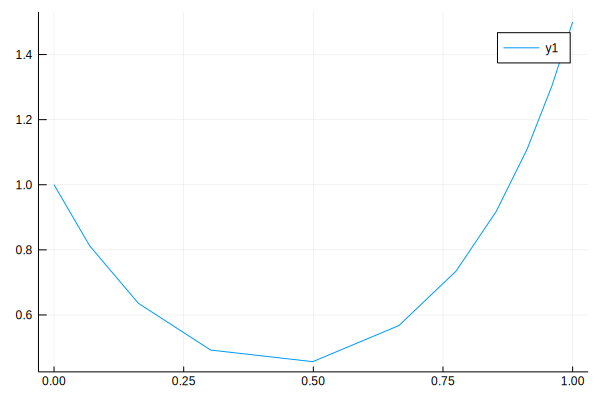

In [35]:
using Plots
Xs=zeros(N_ends)
Ys=zeros(N_ends)
Xs[1]=0
Ys[1]=1
for i in range(2,stop=N_ends)
    Xs[i]=Xs[i-1]+cos(value(s[i-1]))*L_links
    Ys[i]=Ys[i-1]+sin(value(s[i-1]))*L_links
end

plot(Xs,Ys)


In [32]:
print(Xs[11],' ',Ys[11]) 

0.9999999999998146 1.4999999999998552

In [2]:
using SymPy
x = Sym("x")
p = expand((x-1)*(x-2)*(x-3)*(x^2 + x + 1))
real_roots(p)

3-element Array{Sym,1}:
 1
 2
 3

In [6]:
solve(p)

5-element Array{Sym,1}:
                  1
                  2
                  3
 -1/2 - sqrt(3)*I/2
 -1/2 + sqrt(3)*I/2